In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Create a sample dataset
np.random.seed(42)

dates = pd.date_range("2024-01-01", "2024-12-31", freq="D")
categories = ["Electronics", "Clothing", "Groceries", "Home Decor"]

In [4]:
data = pd.DataFrame({
    "date": np.random.choice(dates, 600),
    "category": np.random.choice(categories, 600),
    "sales": np.random.randint(500, 5000, 600)
})

In [5]:
data = data.sort_values("date")

print("Sample Data:")
print(data.head())

Sample Data:
          date     category  sales
447 2024-01-01   Home Decor   1918
263 2024-01-02    Groceries   1636
206 2024-01-02    Groceries   4077
63  2024-01-02  Electronics   3097
326 2024-01-04   Home Decor   1128


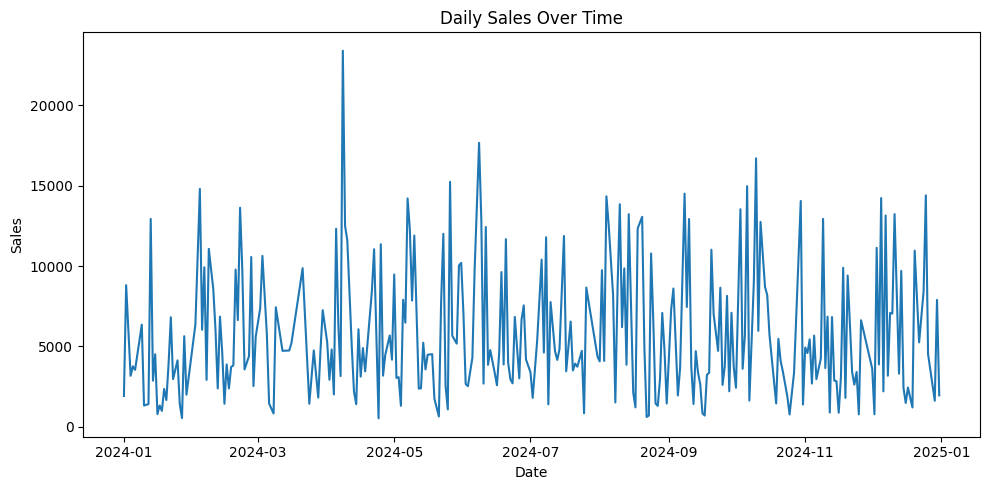

In [ ]:
# Time Series: Daily Sales
daily_sales = data.groupby("date")["sales"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=daily_sales, x="date", y="sales")
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.tight_layout()

# plt.savefig("daily_sales.png", dpi=300)
# plt.close()

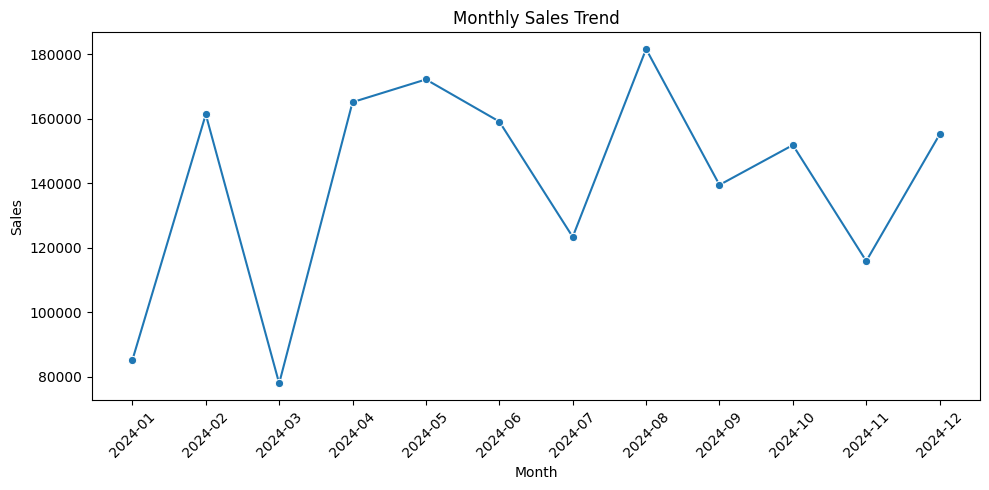

In [ ]:
# Monthly Aggregation
data["month"] = data["date"].dt.to_period("M")
monthly_sales = data.groupby("month")["sales"].sum().reset_index()

monthly_sales["month"] = monthly_sales["month"].astype(str)

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales, x="month", y="sales", marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.tight_layout()

# plt.savefig("monthly_sales.png", dpi=300)
# plt.close()

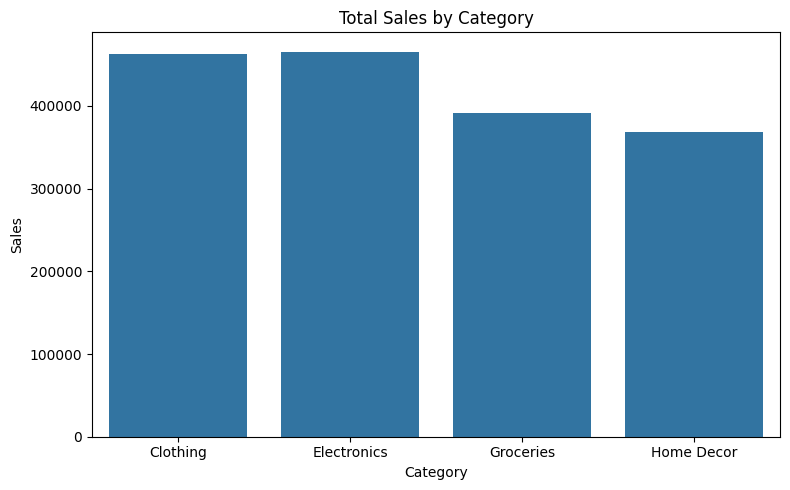

In [ ]:
# Category Bar Chart
category_sales = data.groupby("category")["sales"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=category_sales, x="category", y="sales")
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.tight_layout()

# plt.savefig("category_bar_chart.png", dpi=300)
# plt.close()

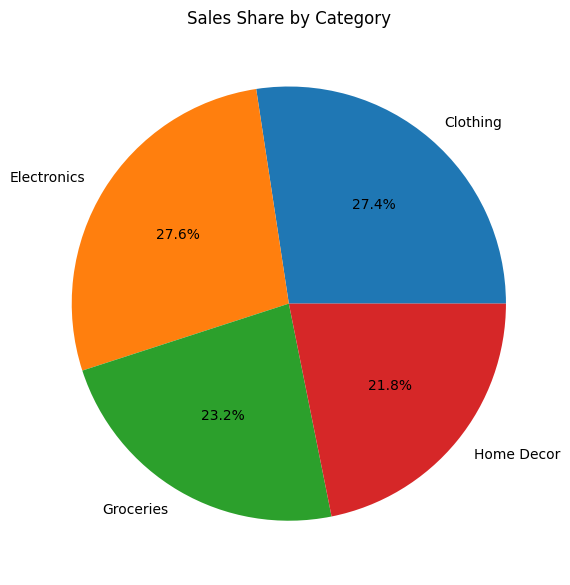

In [12]:
# Category Pie Chart
plt.figure(figsize=(6,6))
plt.pie(category_sales["sales"], labels=category_sales["category"], autopct="%1.1f%%")
plt.title("Sales Share by Category")
plt.tight_layout()

# plt.savefig("category_pie_chart.png", dpi=300)
# plt.close()

In [10]:
# Export Summary
summary_text = f"""
TIME SERIES & CATEGORY CHARTS SUMMARY

Total Records: {len(data)}
Date Range: {data['date'].min().date()} to {data['date'].max().date()}

Top Category by Sales: {category_sales.sort_values('sales', ascending=False).iloc[0]['category']}
Highest Sales Month: {monthly_sales.sort_values('sales', ascending=False).iloc[0]['month']}

Charts Generated:
- daily_sales.png
- monthly_sales.png
- category_bar_chart.png
- category_pie_chart.png
"""

with open("summary.txt", "w") as f:
    f.write(summary_text)

print("\nProject Completed. Charts & summary saved.")


Project Completed. Charts & summary saved.
